In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import math
from skimage.morphology import binary_opening, binary_closing, disk

print("Libs loaded.")

Libs loaded.


1. Dla obrazów z rys.1 i 2 (stworzonego koła i trójkąta na c wykonaj operacje na dwóch zbiorach pikseli białych A i B. Obydwa rysunki są takich samych rozmiarów (0.3pkt).
Operacje logiczne to:
    - suma
    - iloczyn
    - różnica
    - dopełnienie

In [2]:
width, height = 512, 512

def create_equilateral_triangle_image():
    image = Image.new("RGB", (width, height), "black")
    draw = ImageDraw.Draw(image)

    triangle_side = 300
    height_triangle = math.sqrt(3) * triangle_side / 2

    x1 = (width - triangle_side) // 2
    y1 = height // 2 + height_triangle // 2
    x2 = x1 + triangle_side
    y2 = y1
    x3 = x1 + triangle_side // 2
    y3 = y1 - height_triangle

    dx, dy = 80, -100

    draw.polygon([(x1 + dx, y1 + dy), (x2 + dx, y2 + dy), (x3 + dx, y3 + dy)], fill="white")

    image.save("images/white_equilateral_triangle_image.png")
    print("images/white_equilateral_triangle_image.png - SAVED")

def create_image_with_circle():
    image = Image.new("RGB", (width, height), "black")
    draw = ImageDraw.Draw(image)

    circle_radius = 150
    center = (width // 2, height // 2)

    dx, dy = -80, 60
    center_new = (center[0] + dx, center[1] + dy)

    draw.ellipse([(center_new[0] - circle_radius, center_new[1] - circle_radius),
                  (center_new[0] + circle_radius, center_new[1] + circle_radius)], fill="white")


    image.save("images/white_circle_image.png")
    print("images/white_circle_image.png - SAVED")

In [3]:
create_equilateral_triangle_image()
create_image_with_circle()

images/white_equilateral_triangle_image.png - SAVED
images/white_circle_image.png - SAVED


In [4]:
image_circle_path = "images/white_circle_image.png"
image_triangle_path = "images/white_equilateral_triangle_image.png"

image_circle = np.array(Image.open(image_circle_path).convert("L"))
image_triangle = np.array(Image.open(image_triangle_path).convert("L"))

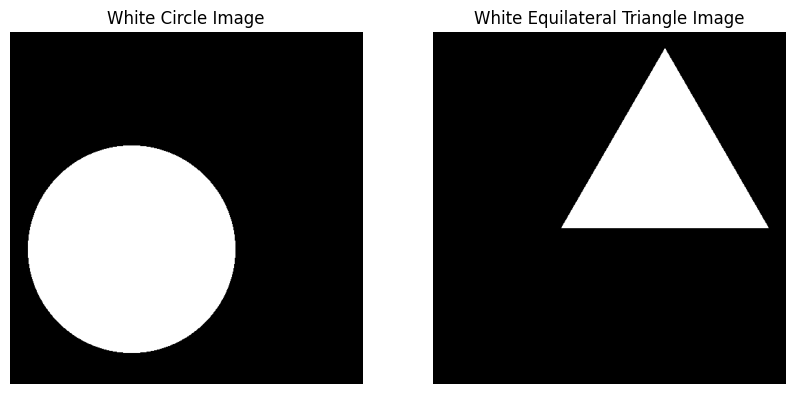

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_circle, cmap='gray')
plt.title('White Circle Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_triangle, cmap='gray')
plt.title('White Equilateral Triangle Image')
plt.axis('off')

plt.show()

In [6]:
def sum_set(A, B):
    return np.clip(A + B, 0, 255).astype(np.uint8)

def product_set(A, B):
    return np.clip(A * B, 0, 255).astype(np.uint8)

def difference_set(A, B):
    return np.clip(A - B, 0, 255).astype(np.uint8)

def complement_set(A):
    return np.clip(255 - A, 0, 255).astype(np.uint8)

In [7]:
sum_result = sum_set(image_circle, image_triangle)
product_result = product_set(image_circle, image_triangle)
difference_result = difference_set(image_circle, image_triangle)
complement_result_triangle = complement_set(image_triangle)
complement_result_circle = complement_set(image_circle)

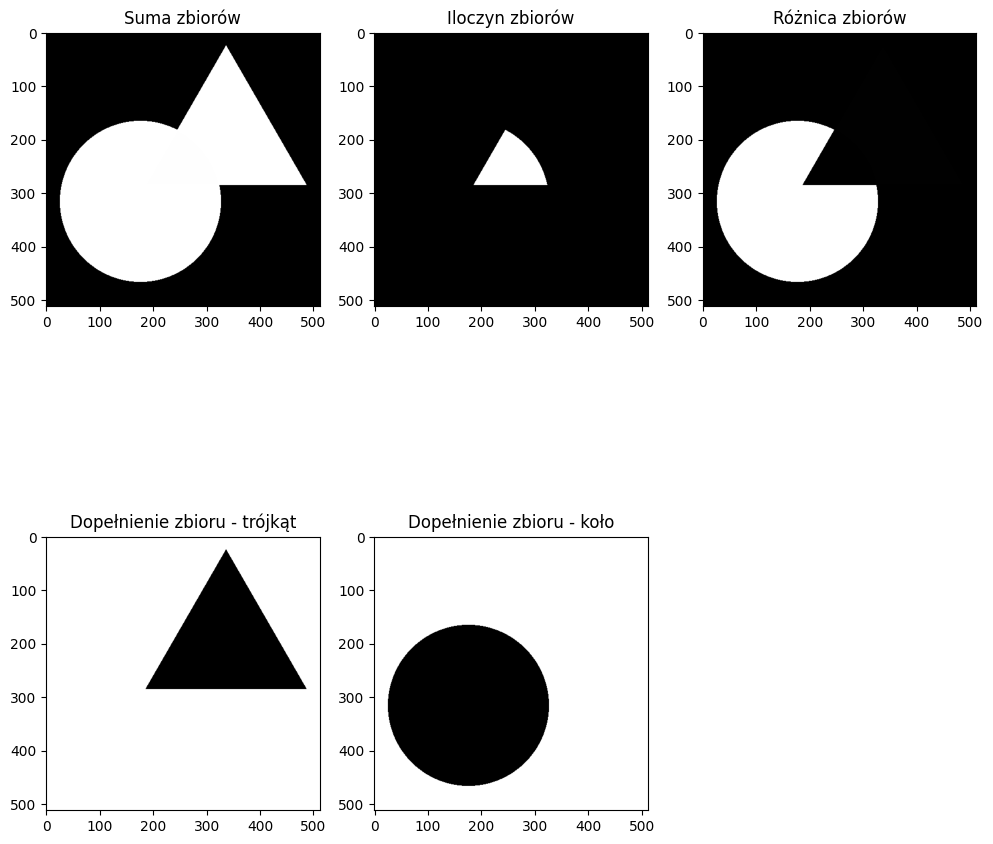

In [8]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 3, 1)
plt.imshow(sum_result, cmap='gray')
plt.title('Suma zbiorów')

plt.subplot(2, 3, 2)
plt.imshow(product_result, cmap='gray')
plt.title('Iloczyn zbiorów')

plt.subplot(2, 3, 3)
plt.imshow(difference_result, cmap='gray')
plt.title('Różnica zbiorów')

plt.subplot(2, 3, 4)
plt.imshow(complement_result_triangle, cmap='gray')
plt.title('Dopełnienie zbioru - trójkąt')

plt.subplot(2, 3, 5)
plt.imshow(complement_result_circle, cmap='gray')
plt.title('Dopełnienie zbioru - koło')

plt.show()

Z dwóch poniższych zadań należy wybrać jedno 2a lub 2b:

2a. Otrzymany po procesie segmentacji obraz binarny zawiera liczne „pustki” (skupiska czarnych pikseli), wewnątrz widocznych obszarów spójnych (obszary białych pikseli). Wykonaj operację dylatacji elementem strukturalnym o takich wymiarach, żeby wypełnić mniejsze z „pustek” (0.7pkt).

2b. Otrzymany po procesie segmentacji obraz binarny, zawiera liczne skupiska białych pikseli o niewielkiej powierzchni na tle tła (obszar czarnych pikseli). Wykonaj kolejno operację otwierania i domykania elementem strukturalnym o takich wymiarach, żeby pozbyć się skupisk białych pikseli o małej powierzchni (0.7pkt).

Wybrane zadanie: 2b

In [14]:
image_mit_robot_path = "images/mit_robot.jpg"
image_mit_robot = cv2.imread(image_mit_robot_path, cv2.IMREAD_GRAYSCALE)

In [15]:
def binarize_image(gray_image, name):
    otsu_threshold, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Image - {name}')
    plt.show()
    return binary_image

In [16]:
def apply_morphological_operations(binary_image, name):
    # Utwórz element strukturalny (kernel)
    selem = disk(5)  # Możesz dostosować rozmiar elementu strukturalnego

    # Binary Opening
    opened_image = binary_opening(binary_image, selem)
    plt.imshow(opened_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Opened Image - {name}')
    plt.show()

    # Binary Closing
    closed_image = binary_closing(binary_image, selem)
    plt.imshow(closed_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Closed Image - {name}')
    plt.show()

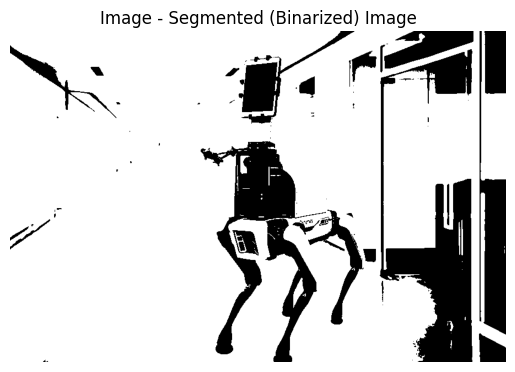

In [17]:
binarized_mit_robot_image = binarize_image(image_mit_robot, 'Segmented (Binarized) Image')

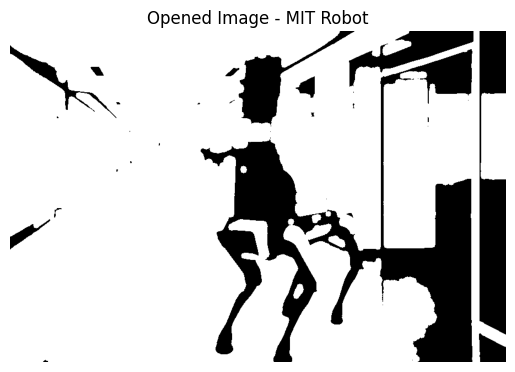

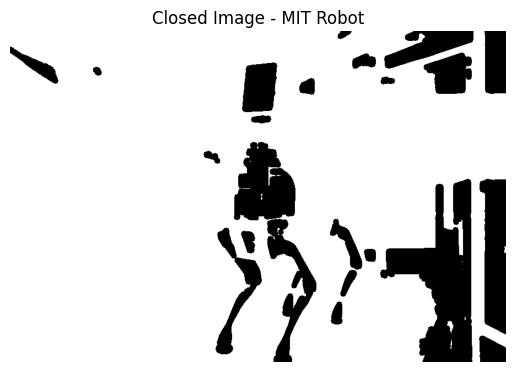

In [18]:
apply_morphological_operations(binarized_mit_robot_image, "MIT Robot")